# Setup

In [158]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/03/e6/4aef6799badc2693548559bad5b56d56cfe89eada337c815fdfe92175250/xgboost-2.0.3-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from statistics import mean
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import xgboost as xgb
import time
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns



## Load Data

In [ ]:
no_outliers = pd.read_csv("No_Outliers.csv")
interaction = pd.read_csv("No_Outliers.csv")

In [ ]:
column_name = 'horizontal_toe_y'  # Replace with the name of the column you're looking for
if column_name in interaction.columns:
    print(f"The column '{column_name}' is in the DataFrame.")
else:
    print(f"The column '{column_name}' is not in the DataFrame.")

## split data

In [115]:
no_outliers = no_outliers.drop(['horizontal_toe_x','horizontal_toe_y','frac_type_Protection Frac','horizontal_midpoint_y','horizontal_midpoint_x','frac_type_Refrac'], axis=1)

In [116]:
X = no_outliers.drop('OilPeakRate', axis=1)
y = no_outliers['OilPeakRate']

In [117]:
# random split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [118]:
# k-fold split
k = 7

kf = KFold(n_splits=k, random_state=42, shuffle=True)
fold = 1
for train_index, test_index in kf.split(X,y):
    print(f"Fold {fold}, Train set: {len(train_index)}, Test set: {len(test_index)}")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Here you can train your model on the X_train and y_train datasets
    # And then test the model on X_test and y_test
    fold += 1

Fold 1, Train set: 22063, Test set: 3678
Fold 2, Train set: 22063, Test set: 3678
Fold 3, Train set: 22064, Test set: 3677
Fold 4, Train set: 22064, Test set: 3677
Fold 5, Train set: 22064, Test set: 3677
Fold 6, Train set: 22064, Test set: 3677
Fold 7, Train set: 22064, Test set: 3677


## Model

### Linear Regression

In [138]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(rmse)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

104.16502469129658
Mean Squared Error: 10850.352368938426
R-squared: 0.41083329473874386


### Random Forest

#### Without Interaction Term

In [119]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [120]:
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 6377.226217504173


In [121]:
rmse = np.sqrt(mse)
rmse

79.85753701125633

In [122]:
feature_names = X_train.columns

importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)
feature_importance_df.to_csv("feature_importance.csv", index = False)

                                            Feature  Importance
10                               proppant_intensity    0.107754
40                           proppant_intensity_log    0.097947
9                               true_vertical_depth    0.091254
7                                    total_proppant    0.084347
3                                              bh_y    0.073223
1                                         surface_y    0.061492
0                                         surface_x    0.058746
5                           gross_perforated_length    0.040739
2                                              bh_x    0.040584
13                       average_proppant_per_stage    0.035058
6                                  number_of_stages    0.025100
12                             average_stage_length    0.024725
4                        standardized_operator_name    0.024252
11                             frac_fluid_intensity    0.023473
18                                      

In [139]:
feature_importance_df['Importance'].count()

43

In [148]:
X_df = pd.DataFrame(X, columns=feature_names)
for feature, importance in zip(feature_names, importances):
    if importance < 0.002:
        X_df.drop(feature, axis=1, inplace=True)

In [149]:
X_df.shape[1]

38

In [150]:
#correlations = no_outliers.drop('OilPeakRate', axis=1).corrwith(no_outliers['OilPeakRate'])

In [151]:
#feature_names = X.columns
#corr_df = pd.DataFrame({
#    'Feature': feature_names,
#    'Correlation': correlations
#}).sort_values(by='Correlation', ascending=False)
#corr_df

In [152]:
#X_df = pd.DataFrame(X, columns=feature_names)
#for feature, correlation in zip(feature_names, correlations):
#    if abs(correlation) < 0.03:
#        X_df.drop(feature, axis=1, inplace=True)

In [153]:
y = no_outliers['OilPeakRate']
# k-fold split
k = 7

kf = KFold(n_splits=k, random_state=42, shuffle=True)
fold = 1
for train_index, test_index in kf.split(X_df,y):
    print(f"Fold {fold}, Train set: {len(train_index)}, Test set: {len(test_index)}")
    X_train, X_test = X_df.iloc[train_index], X_df.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Here you can train your model on the X_train and y_train datasets
    # And then test the model on X_test and y_test
    fold += 1

Fold 1, Train set: 22063, Test set: 3678
Fold 2, Train set: 22063, Test set: 3678
Fold 3, Train set: 22064, Test set: 3677
Fold 4, Train set: 22064, Test set: 3677
Fold 5, Train set: 22064, Test set: 3677
Fold 6, Train set: 22064, Test set: 3677
Fold 7, Train set: 22064, Test set: 3677


In [154]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 6354.755354865194


In [155]:
rmse = np.sqrt(mse)
rmse

79.71671941860875

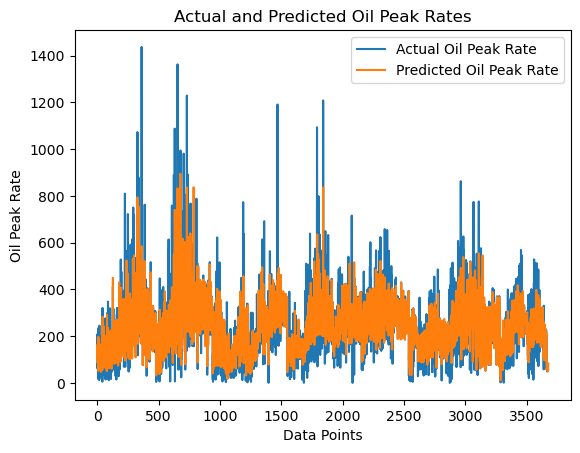

In [156]:
plt.plot(list(y_test), label='Actual Oil Peak Rate')
plt.plot(y_pred, label='Predicted Oil Peak Rate')


plt.title('Actual and Predicted Oil Peak Rates')
plt.xlabel('Data Points')
plt.ylabel('Oil Peak Rate')

plt.legend()
plt.show()

### XGBoost

In [160]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
in_sample_rmse = []
out_of_sample_rmse = []
y_predictions = []
for train_index, test_index in kfold.split(X, y):
    X_train_data, X_test_data = X.iloc[train_index], X.iloc[test_index]
    y_train_data, y_test_data = y.iloc[train_index], y.iloc[test_index]
    xgboost = xgb.XGBRegressor(objective ='reg:squarederror', eval_metric="rmse")
    xgboost.fit(X_train_data, y_train_data)
    param_XGBoost = {
    'n_estimators': [50, 100, 200],
    "max_depth": [3, 5, 7]
}
    grid_search = GridSearchCV(xgboost, param_XGBoost, cv=10, scoring = 'neg_root_mean_squared_error')
    grid_search.fit(X_train_data, y_train_data)
    best_param_xg = grid_search.best_params_
    best_rmse = grid_search.best_score_
    print("Best performing hyperparameters:")
    print(best_param_xg)
    print("In sample " + str(best_rmse))
    in_sample_rmse.append(best_rmse)
    best_model = grid_search.best_estimator_
    y_predict = best_model.predict(X_test_data)
    y_predictions.append(y_predict)
    print("Consumer predicted scores:")
    print(y_predict)
    score = mean_squared_error(y_test_data, y_predict)
    out_of_sample_rmse.append(score)
    print("Out of sample " + str(score))

    feature_importance = xgboost.feature_importances_
    feature_importance_dict = {}
    for i in range(len(X_train_data.columns)):
        feature_importance_dict[X_train_data.columns[i]] = feature_importance[i]
    sorted_dict = dict(sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True))
    print("Feature importance dictionary:")
    print(sorted_dict)

Best performing hyperparameters:
{'max_depth': 3, 'n_estimators': 100}
In sample -99.3218931764545
Consumer predicted scores:
[ 71.86391  106.83062  122.664    ...  71.13175   66.5343    26.105606]
Out of sample 6562.087407862533
Feature importance dictionary:
{'proppant_intensity': 0.099554375, 'well_family_relationship_Sibling Well': 0.09733187, 'total_proppant': 0.08860376, 'bh_y': 0.07181269, 'bin_lateral_length': 0.067067586, 'ffs_frac_type_Undefined': 0.06469035, 'true_vertical_depth': 0.042864446, 'surface_y': 0.02793372, 'ffs_frac_type_Slickwater Only': 0.025807038, 'average_proppant_per_stage': 0.02536118, 'bh_x': 0.02510909, 'surface_x': 0.024662687, 'standardized_operator_name': 0.021240143, 'frac_seasoning_log': 0.020660242, 'total_fluid_log': 0.020480944, 'gross_perforated_length': 0.018726181, 'batch_frac_classification_Unknown': 0.018393716, 'total_fluid': 0.018100798, 'frac_fluid_intensity': 0.014874247, 'ffs_frac_type_Slickwater Crosslink Hybrid': 0.014780262, 'average

Best performing hyperparameters:
{'max_depth': 3, 'n_estimators': 100}
In sample -98.67169532069416
Consumer predicted scores:
[103.90592  125.0692   113.16908  ...  16.89575   23.141611  65.35562 ]
Out of sample 7333.659856406673
Feature importance dictionary:
{'total_proppant': 0.103643104, 'well_family_relationship_Sibling Well': 0.09021204, 'bin_lateral_length': 0.08844411, 'proppant_intensity': 0.07950062, 'ffs_frac_type_Undefined': 0.06519564, 'bh_y': 0.05948502, 'surface_y': 0.043324962, 'true_vertical_depth': 0.04159625, 'total_fluid_log': 0.03318451, 'bh_x': 0.027892286, 'surface_x': 0.025016181, 'total_fluid': 0.02024095, 'standardized_operator_name': 0.019862575, 'average_proppant_per_stage': 0.018557057, 'batch_frac_classification_Batch-Concurrent Frac': 0.018081011, 'gross_perforated_length': 0.017781232, 'relative_well_position_Unknown': 0.016990451, 'frac_fluid_intensity': 0.016041921, 'ffs_frac_type_Slickwater Only': 0.015537065, 'batch_frac_classification_Unknown': 0.0

In [161]:
print("Mean of in sample rmse: ")
print(np.mean(in_sample_rmse))
print("Standard deviation of in sample rmse: ")
print(np.std(in_sample_rmse))
print("Mean of out of sample rmse: ")
print(np.mean(out_of_sample_rmse))
print("Standard deviation of out of sample rmse: ")
print(np.std(out_of_sample_rmse))
print("Predicted scores: ")
for elt in y_predictions:
    print(list(elt))

Mean of in sample rmse: 
-98.56127483232468
Standard deviation of in sample rmse: 
0.5519837811731223
Mean of out of sample rmse: 
7601.457791066039
Standard deviation of out of sample rmse: 
606.7432468759384
Predicted scores: 
[71.86391, 106.83062, 122.664, 116.169426, 106.21902, 98.288376, 194.17856, 126.744545, 144.46175, 136.9616, 160.39178, 93.81294, 70.00763, 72.929726, 155.83511, 141.69366, 64.828415, 75.55911, 70.50133, 145.286, 93.34206, 101.178185, 47.596397, 63.53677, 112.567116, 140.2324, 80.77264, 115.0564, 117.21736, 104.56428, 113.872734, 154.15718, 82.16733, 63.915237, 62.922756, 105.41199, 103.77678, 5.6292257, 156.01097, 145.10811, 82.79001, 134.15479, 127.71555, 163.36162, 136.2283, 148.70938, 137.95998, 172.12346, 117.1696, 77.85529, 170.66689, 90.96353, 90.75929, 66.79585, 126.31175, 136.03128, 94.16028, 166.22583, 107.697815, 126.69869, 190.02078, 233.21007, 97.98889, 187.62244, 171.28668, 89.33322, 180.09094, 111.34243, 164.59697, 131.79341, 147.6567, 85.53657, 

In [162]:
rmse = np.sqrt(np.mean(out_of_sample_rmse))
rmse

87.18633947509231